<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Thank you for taking the time to improve the project! It is accepted now, and you can move on to the next sprint. Keep up the good work! :)
	  
</div>

**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, there are only a couple of small problems that need to be fixed before the project is accepted. It should be pretty straightforward though!

# Project Description

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

## Import Packages

In [1]:
!pip install scikit-learn==0.24.1
!pip install missingno
!pip install --upgrade pyod
!pip install seaborn==0.11.2
!pip install matplotlib==3.4.3
!pip install optuna
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 22.3 MB 1.0 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 113 kB 1.1 MB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-0.9.5-py3-none-any.whl size=132697 sha256=36ca0dc7133471a05828fda3e9360478c23cf6a786f511d152f0138224b946c1
  Stored in directory: /home/jovyan/.cache/pip/wheels/3d/bb/b7/62b60fb451b33b0df1ab8006697fba7a6a49709a629055cf77
Successfully built pyod
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.1 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 1.1 MB/s eta 0:00:01


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 308 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 144 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 12.3 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11106 sha256=cd763a91d4cd9766643a836454e344c9c188dcfa853a3408e2ac2326df9d9f95
  Stored in directory: /home/jovyan/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal si

In [38]:
#import packages
#base packages for data analysis
import pandas as pd
import numpy as np

#packages for machine learning 
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

#packages for cross validation
from yellowbrick.model_selection import CVScores

#packages for missing values
import missingno as msno

#packages for graphics
import seaborn as sns
import matplotlib.pyplot as plt

#packages for hyperparameter choice
import optuna
from optuna.samplers import TPESampler
optuna.logging.set_verbosity(optuna.logging.WARNING)
from optuna.visualization import plot_optimization_history

#other packages
import time
import warnings
warnings.filterwarnings('ignore')

### Conclusions

I imported:

- **pandas**: For data analysis and data manipulation
- **numpy**: For scientific computing 
- **sklearn**: 
    - **mean_absolute_error**: For measuring the mean absolute error
    - **KNNImputer**: For inputing missing values
    - **train_test_split**: For splitting data for machine learning 
    - **RegressorChain**: For running regressions with multiple targets
    - **LinearRegression**: For running linear regressions
    - **DecisionTreeRegressor**: For running decision tree regressions
    - **RandomForestRegressor**: For running random forest regressions
    - **make_scorer**: To create a score out of a function
    - **KFold**: For choosing the number of cross-validation samples
    - **DummyRegressor**: For baseline comparisons
- **yellowbrick**:
    - **CVScores**: For running cross-vaidation
- **missingno**: For missing value visualizations
- **seaborn** and **matplotlib.plyplot**: For visualizations
- **optuna**: For hyperparameter optimization
    - **TPESample**: For replicating hyperparamter optimization results
    - **plot_optimization_history**: For hyperparmater optimization visualizations
- **time**: To look at the time it takes to complete tasks
- **warnings**: To remove warnings for results

## Data Preprocessing

### Download The Data

In [3]:
#import training data
try:
    train = pd.read_csv('gold_recovery_train.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
#import testing data
try:
    test = pd.read_csv('gold_recovery_test.csv')
except:
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
#import full data
try:
    full = pd.read_csv('gold_recovery_full.csv')
except:
    full = pd.read_csv('/datasets/gold_recovery_full.csv')

### Convert Dates

In [4]:
#convert dates to datetime
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')

### Check Recovery Calculation

In [5]:
#recovery calculation
train['recovery_calc'] = ((train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au']-train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au']-train['rougher.output.tail_au'])))*100
#dropping rows with missing values for recovery
train_MAE = train.dropna(axis='index', subset=['rougher.output.recovery'])
#calculating the MAE
MAE = mean_absolute_error(train_MAE['recovery_calc'], train_MAE['rougher.output.recovery'])
#dropping recovery_calc for the future
train.drop('recovery_calc',axis=1,inplace=True)
print('The mean absolute error between the caclulated and the reported recovery of gold is', MAE)

The mean absolute error between the caclulated and the reported recovery of gold is 9.444891926100695e-15


#### Conclusions

In this section I calculated the recovery of gold using the formula provided and then, using the mean absolute error, compared the values to the provided recovery of gold in the training dataset. As seen above, the mean absolute error was incredibly small, which lets us know we do not have an issue with the recoveries provided in the data. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Recovery data was validated successfully!
	  
</div>

### Analyzing Variables Not In Test Set

In [6]:
#find the variables not in the testing dataset
variables = []
#for each variable in the training set
for x in train.columns:
    #if the variable is in the test set
    if x in test.columns:
        continue
    else:
        #if the variable is not in the test set, add it to our list of variables
        variables.append(x)
#look at the info for those variables
train[variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.output.concentrate_sol      

#### Conclusions

The above variables are missing from the testing dataset. These columns are all outputs and calculations that will only be available after purification is finished. The testing dataset needs to at least have the recovery variables to be able to test our machine learning model, so for that reason, I am going to have to add those variables from the full dataset to the testing dataset.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
What do these variables have in common? Well, they are either outputs or calculations based on those outputs. So they can't be accessed before the process is finished, and thus can't be used in our models.
    
You are right, that we need recovery variables to be able to test the model, but these are targets, so it makes sense.
	  
</div>

### Missing Values

#### Look At Correlation of Missingness

<AxesSubplot:>

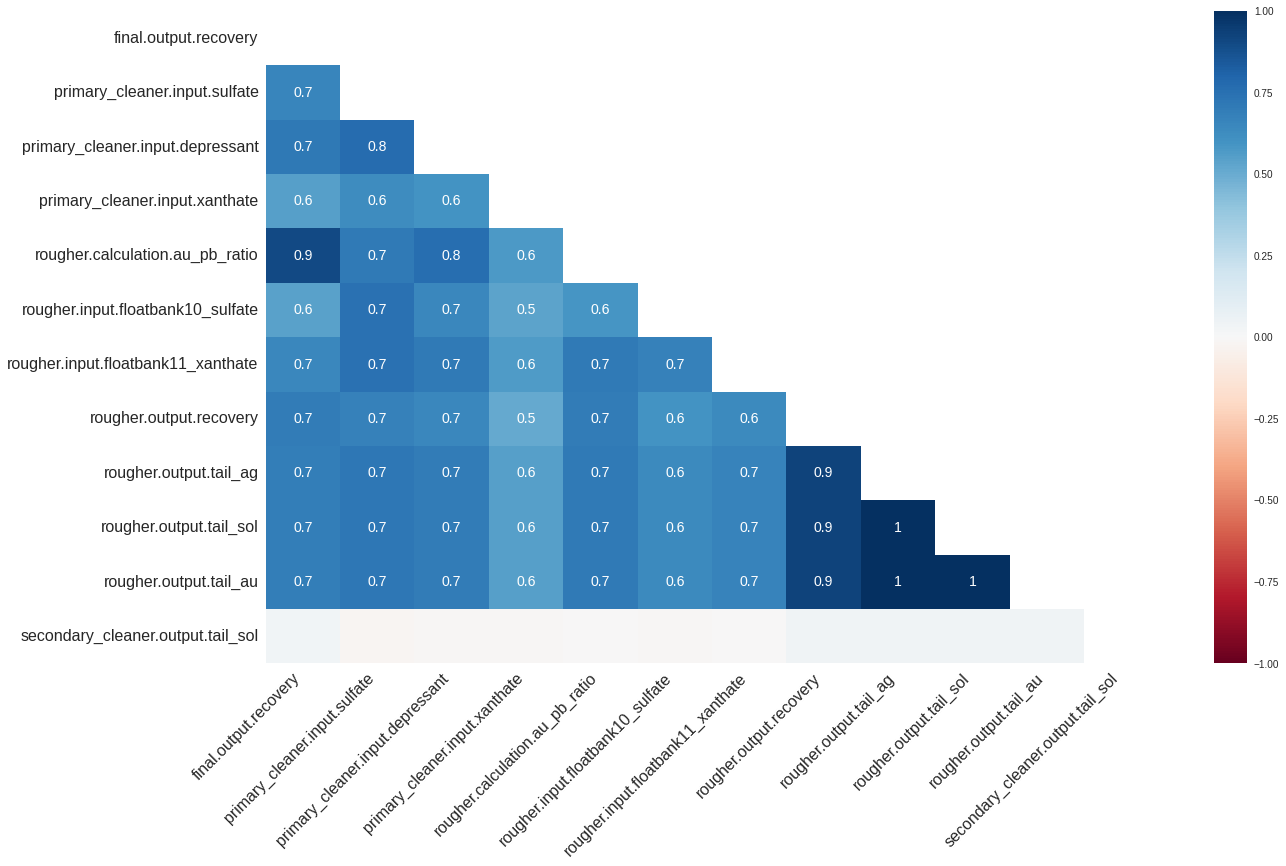

In [7]:
#find variables with 5% or higher missing rates
missing_vars=[]
#for each variable in the full dataset
for x in full.columns:
    #if the variable is missing more than 5% of the time
    if full[x].isnull().mean() > 0.05:
        #add it to our list of variables
        missing_vars.append(x)
    else:
        continue
#look at correlations of missingness of those variables
msno.heatmap(full[missing_vars])



##### Conclusions

The variables with missing rates higher than 5% seem to have high positive correlation with each other. This leads me to believe the missing data is not missing completely at random.  

#### Impute with KNN

In [8]:
#fit and transform the data using a KNNImputer
full_imp = KNNImputer().fit_transform(full.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1))
#turn the results into a dataframe
full_imp = pd.DataFrame(full_imp, columns=full.drop(['date','final.output.recovery','rougher.output.recovery'],axis=1).columns)
#add date and target variabbles back to the dataframe
full_imp['date'] = full['date']
full_imp['final.output.recovery'] = full['final.output.recovery']
full_imp['rougher.output.recovery'] = full['rougher.output.recovery']
#look at the information of the full dataset with imputed values
full_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
final.output.concentrate_ag                           22716 non-null float64
final.output.concentrate_pb                           22716 non-null float64
final.output.concentrate_sol                          22716 non-null float64
final.output.concentrate_au                           22716 non-null float64
final.output.tail_ag                                  22716 non-null float64
final.output.tail_pb                                  22716 non-null float64
final.output.tail_sol                                 22716 non-null float64
final.output.tail_au                                  22716 non-null float64
primary_cleaner.input.sulfate                         22716 non-null float64
primary_cleaner.input.depressant                      22716 non-null float64
primary_cleaner.input.feed_size                       22716 non-null float64
primary_cleaner.input.xanthate              

##### Conclusions

In this section I used a K-Nearest Neighbors (KNN) technique to impute the missing values in the full dataset. This technique replaces the missing value with the mean value from the 5 nearest neighbors (by euclidean distance). I used this technique because of the clear dependencies between the missing values seen in section 2.5.1.  

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Very good! missing values were imputed using a reasonable method. One small problem: you imputed missing targets as well.
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Fixed!
	  
</div>

### Updating Train and Test Datasets

In [9]:
#check for duplicates
print('The number of duplicated dates in the full dataset is', full['date'].duplicated().sum())
#appending training data to full data
full_train = full_imp.append(train,ignore_index=True)
#updating the train data by removing rows that are not from the training data then dropping the duplicates
train_upd = full_train[full_train.duplicated(subset=['date'],keep='last')]
#appending testing data to full data
full_test = full_imp.append(test,ignore_index=True)
#updating the train data by removing rows that are not from the training data then dropping the duplicates
test_upd = full_test[full_test.duplicated(subset=['date'],keep='last')]
train_upd.info()

The number of duplicated dates in the full dataset is 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_au                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
primary_cleaner.input.depressant                      1686

#### Conclusions

The unique identifier in this dataset is `date`, so I used that to take the newly imputed full dataset and split it by the observations from the original training and testing datasets. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Ok, that works!
	  
</div>

## Analyze Data

### Concentration Change By Purification Stage

[Text(0, 0, '6.9'), Text(0, 0, '8.8'), Text(0, 0, '9.1')]

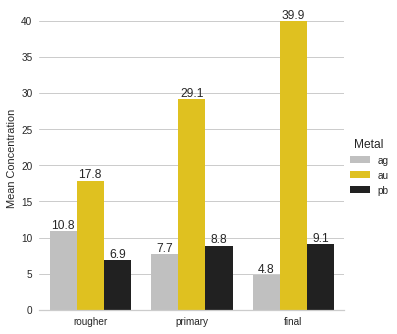

In [10]:
#create a dataframe of just the concentrate values
concentrates = full_imp[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 
                         'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 
                         'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb']]

concentrates_mean = []
#for each variable in the concentrates dataframe
for x in concentrates.columns:
    #add the mean value for those concentrations to our list
    concentrates_mean.append(concentrates[x].mean())
#take those mean values and turn it into a dataframe
concentrates_mean = pd.DataFrame(concentrates_mean, index = concentrates.columns,columns=['mean'])
#add in variables to define the metal and level for each concentration
concentrates_mean['Metal'] = ['ag','au','pb','ag','au','pb','ag','au','pb']
concentrates_mean['level'] = ['final','final','final','primary','primary','primary','rougher','rougher','rougher']
#sort values to put the graph in order of the process
concentrates_mean.sort_values(by='level',ascending=False,inplace=True)
#create a bar graph
g = sns.catplot(
    data=concentrates_mean, kind="bar",
    x="level", y="mean", hue="Metal",
    palette = sns.color_palette(['#C0C0C0','#FFD700','#212121']))
#despine the left side, add labels, and add values on top of each bar
g.despine(left=True)
g.set_axis_labels("", "Mean Concentration")
ax = g.axes[0, 0]
ax.bar_label(ax.containers[0],fmt='%.1f')
ax.bar_label(ax.containers[1],fmt='%.1f')
ax.bar_label(ax.containers[2],fmt='%.1f')

#### Conclusions

The graph above shows that as the cleaning process goes on, the concentration of gold increases. This is important to note because this shows the overall value in the process. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, so the process is working as expected!
	  
</div>

### Input Feeds In Training and Testing Data

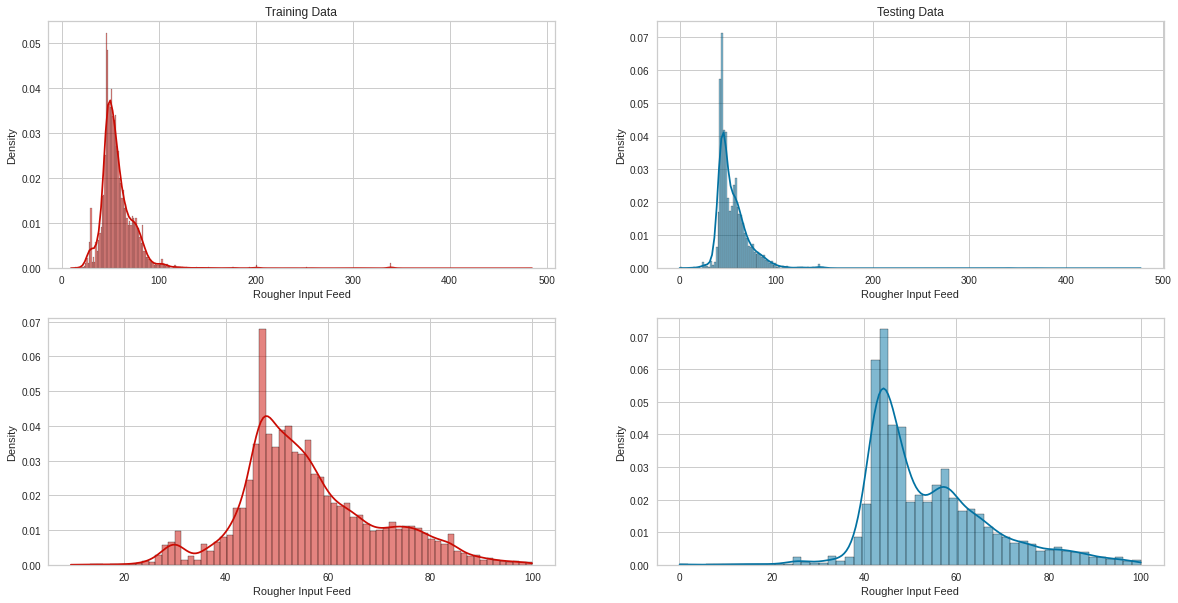

In [11]:
#create a graph with two density histograms. The input feed values for the training and the testing datasets.
fig,ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(ax=ax[0,0], data = train_upd['rougher.input.feed_size'], kde=True,stat='density',color='r')
sns.histplot(ax=ax[0,1], data = test_upd['rougher.input.feed_size'], kde=True,stat='density')
ax[0,0].set_title('Training Data');
ax[0,0].set_xlabel('Rougher Input Feed');
ax[0,1].set_title('Testing Data');
ax[0,1].set_xlabel('Rougher Input Feed');
#update the histograms to get a closer look at the distributions
sns.histplot(ax=ax[1,0], data = train_upd[train_upd['rougher.input.feed_size']<100]['rougher.input.feed_size'], kde=True,stat='density',color='r')
sns.histplot(ax=ax[1,1], data = test_upd[test_upd['rougher.input.feed_size']<100]['rougher.input.feed_size'], kde=True,stat='density')
ax[1,0].set_xlabel('Rougher Input Feed');
ax[1,1].set_xlabel('Rougher Input Feed');

#### Conclusions

Looking at these distributions, there are not clear differences between the training and testing data inputs. The training data seems to have a more normal distribution, but I would suspect that is due to the higher number of observations in the dataset. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Alright! It would be easier to compare two distributions if you put it on the same axis
	  
</div>

### Total Concentrations By Stage

In [12]:
#create 4 variables that sum up the concentration of all metals at each stage of processing
full_imp['raw_feed_conc_total'] = full_imp['rougher.input.feed_ag'] + full_imp['rougher.input.feed_au'] + full_imp['rougher.input.feed_pb'] + full_imp['rougher.input.feed_sol'] 
full_imp['rougher_conc_total'] = full_imp['rougher.output.concentrate_ag'] + full_imp['rougher.output.concentrate_au'] + full_imp['rougher.output.concentrate_pb'] + full_imp['rougher.output.concentrate_sol']
full_imp['primary_cleaner_conc_total']= full_imp['primary_cleaner.output.concentrate_ag'] + full_imp['primary_cleaner.output.concentrate_au']  + full_imp['primary_cleaner.output.concentrate_pb'] + full_imp['primary_cleaner.output.concentrate_sol']  
full_imp['final_conc_total'] = full_imp['final.output.concentrate_ag'] + full_imp['final.output.concentrate_au'] + full_imp['final.output.concentrate_pb'] + full_imp['final.output.concentrate_sol'] 

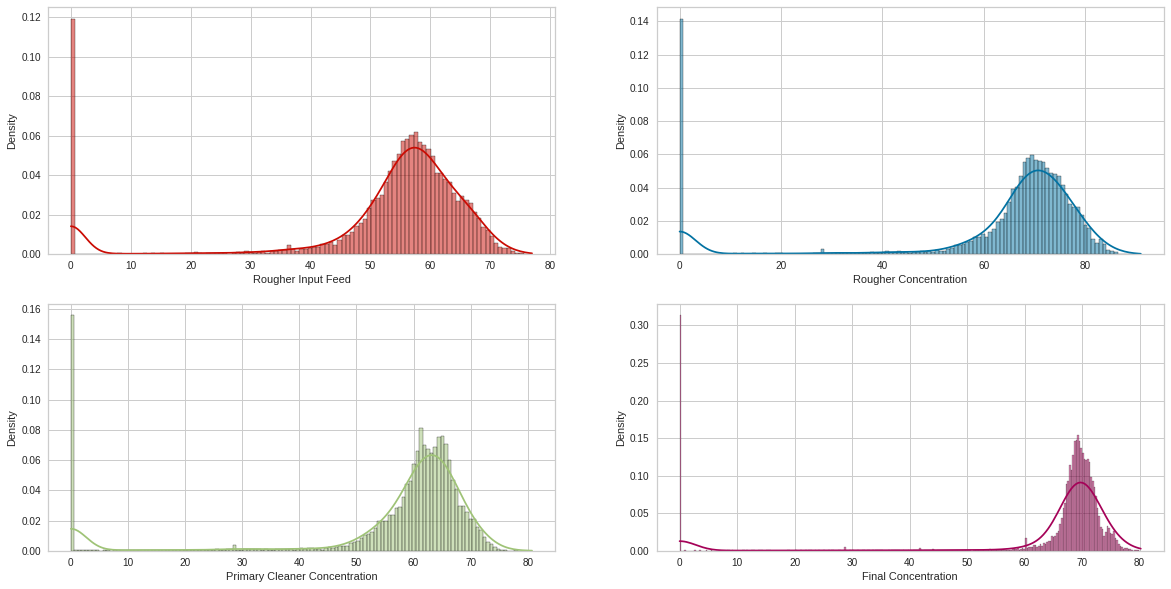

In [13]:
#plot the distributions of the concentration of all metals at each stage 
fig,ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(ax=ax[0,0], data = full_imp['raw_feed_conc_total'], kde=True,stat='density',color='r')
ax[0,0].set_xlabel('Rougher Input Feed');
sns.histplot(ax=ax[0,1], data = full_imp['rougher_conc_total'], kde=True,stat='density',color='b')
ax[0,1].set_xlabel('Rougher Concentration');
sns.histplot(ax=ax[1,0], data = full_imp['primary_cleaner_conc_total'], kde=True,stat='density',color='g')
ax[1,0].set_xlabel('Primary Cleaner Concentration');
sns.histplot(ax=ax[1,1], data = full_imp['final_conc_total'], kde=True,stat='density',color='m')
ax[1,1].set_xlabel('Final Concentration');


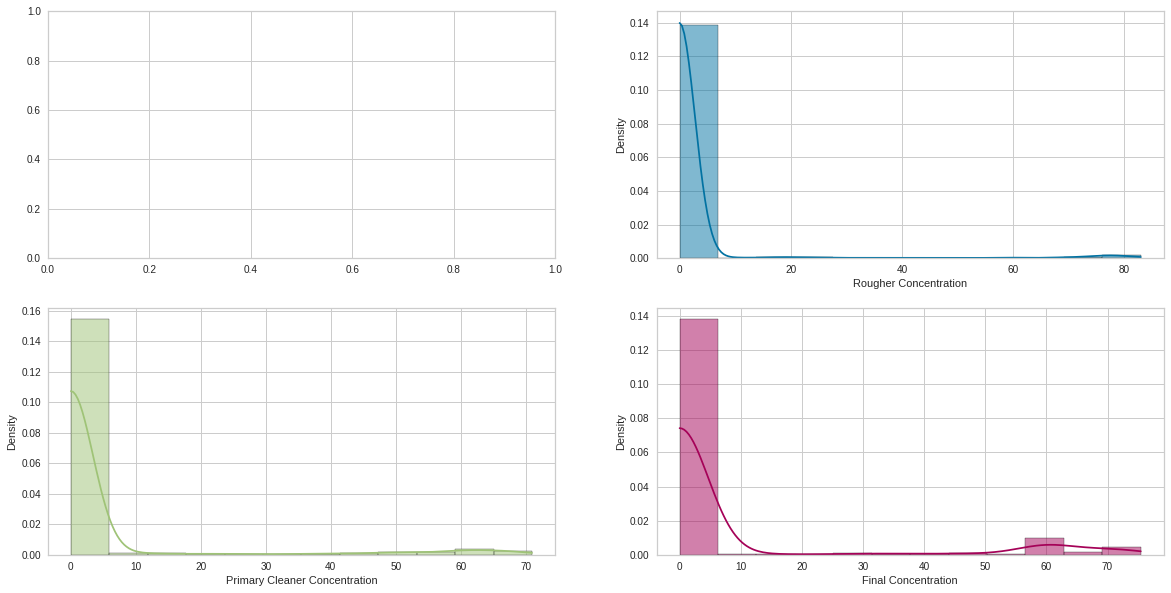

In [14]:
#plot the distributions of the concentration of all metals at each stage 
fig,ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(ax=ax[0,1], data = full_imp[full_imp['raw_feed_conc_total']==0]['rougher_conc_total'], kde=True,stat='density',color='b')
ax[0,1].set_xlabel('Rougher Concentration');
sns.histplot(ax=ax[1,0], data = full_imp[full_imp['raw_feed_conc_total']==0]['primary_cleaner_conc_total'], kde=True,stat='density',color='g')
ax[1,0].set_xlabel('Primary Cleaner Concentration');
sns.histplot(ax=ax[1,1], data = full_imp[full_imp['raw_feed_conc_total']==0]['final_conc_total'], kde=True,stat='density',color='m')
ax[1,1].set_xlabel('Final Concentration');

#### Conclusions

When looking at the total concentration of metals at each stage of the purification process, the density of zero's is surprising. At this point, I would want to discuss this with someone who works on the process to see why this may be the case. Yet, since that is not possible, I looked at the outcomes for each stage when the feed starts with zero metal concentration. Based on the above graph, I think it is fair to say that it will likely lead to zero final concentration, so the best thing for Zyfra to do would be to not process those pieces of ore. For that reason, I am removing those observations from our model.

#### Total Concetrations by Stage with Observations Removing Zeros

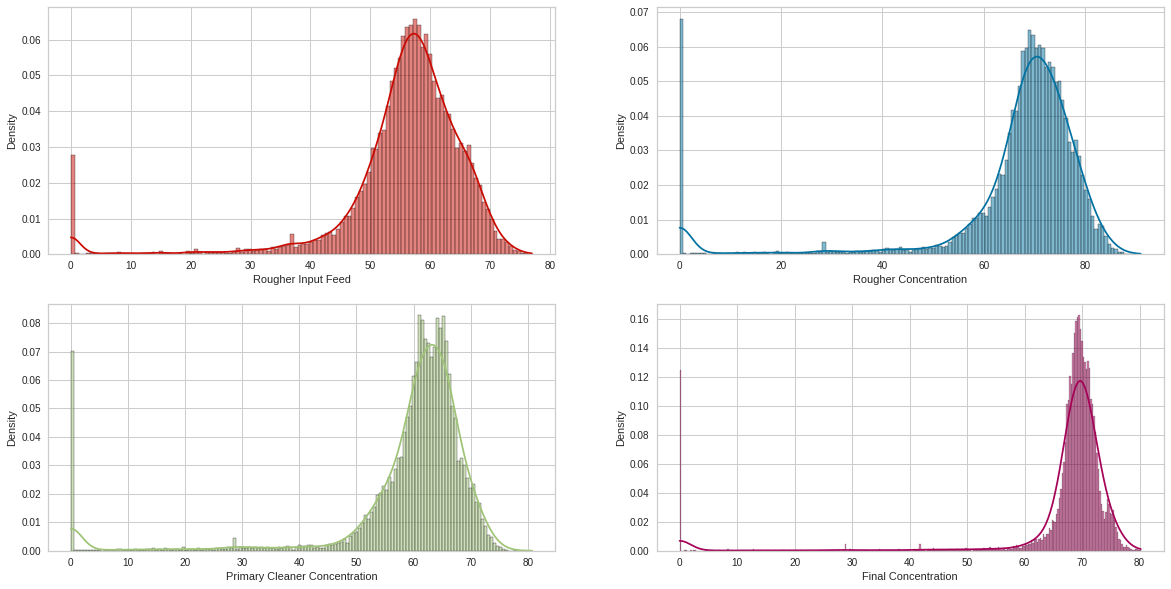

In [15]:
#drop all observations that have zero concentration at each stage of the process
full_imp_drop_zero = full_imp.drop(full_imp[full_imp['raw_feed_conc_total'] == 0].index)

fig,ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(ax=ax[0,0], data = full_imp_drop_zero['raw_feed_conc_total'], kde=True,stat='density',color='r')
ax[0,0].set_xlabel('Rougher Input Feed');
sns.histplot(ax=ax[0,1], data = full_imp_drop_zero['rougher_conc_total'], kde=True,stat='density',color='b')
ax[0,1].set_xlabel('Rougher Concentration');
sns.histplot(ax=ax[1,0], data = full_imp_drop_zero['primary_cleaner_conc_total'], kde=True,stat='density',color='g')
ax[1,0].set_xlabel('Primary Cleaner Concentration');
sns.histplot(ax=ax[1,1], data = full_imp_drop_zero['final_conc_total'], kde=True,stat='density',color='m')
ax[1,1].set_xlabel('Final Concentration');

#### Conclusions

Looking at the updated graphs, the density at zero has decreased dramatically. Still, there is an argument to be made to remove more observations, but I chose to be cautious due to my lack of experience in the field. 

#### Updating Training and Testing Data

In [16]:
#remove from training data
train_upd['raw_feed_conc_total'] = train_upd['rougher.input.feed_ag'] + train_upd['rougher.input.feed_au'] + train_upd['rougher.input.feed_pb'] + train_upd['rougher.input.feed_sol'] 
train_upd_drop_zero = train_upd.drop(train_upd[(train_upd['raw_feed_conc_total'] == 0)].index).reset_index(drop=True)
train_upd_drop_zero.drop(['raw_feed_conc_total'],axis=1,inplace=True)

#remove from testing data
test_upd['raw_feed_conc_total'] = test_upd['rougher.input.feed_ag'] + test_upd['rougher.input.feed_au'] + test_upd['rougher.input.feed_pb'] + test_upd['rougher.input.feed_sol'] 
test_upd_drop_zero = test_upd.drop(test_upd[(test_upd['raw_feed_conc_total'] == 0)].index).reset_index(drop=True)
test_upd_drop_zero.drop(['raw_feed_conc_total'],axis=1,inplace=True)

#### Conclusions

 In this section, I removed the instances where the concentration of metals in the input process was zero from the training and testing datasets.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Anomalous values were detected and removed
	  
</div>

## Building A Model

### Create sMAPE Functions

In [18]:
def sMAPE_final(y_true,y_pred):
    #creating a vector of the sums from the summation for the rougher recovery
    sMAPE_rougher = np.abs(y_true.iloc[:,0]-y_pred[:,0])/((np.abs(y_true.iloc[:,0])+np.abs(y_pred[:,0]))/2)
    #creating a vector of the sums from the summation for the final recovery
    sMAPE_final = np.abs(y_true.iloc[:,1]-y_pred[:,1])/((np.abs(y_true.iloc[:,1])+np.abs(y_pred[:,1]))/2)
    #addign up the sums from each recovery stage, dividing by the total number of obsertaions, multiplying by 100 and creating the score using the linear combination provided in the formula
    sMAPE_total_score = ((sMAPE_rougher.sum() / len(y_true))*100)*0.25 + ((sMAPE_final.sum() / len(y_true))*100)*0.75
    return sMAPE_total_score

<div class="alert alert-warning">
<s><b>Reviewer's comment</b>
	  
SMAPE calculation function is not quite correct: `np.abs(y_true.iloc[:,*]+y_pred[:,*])` should be `np.abs(y_true.iloc[:,*])+np.abs(y_pred[:,*])`, although it wouldn't make any difference in our case, as recovery values are strictly non-negative.
	  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Corrected!
	  
</div>

#### Conclusions

This function inputs are two column matrices with the rougher recovery in the first column, and the final recovery in the second column. It returns the final sMAPE value, which can be used for optimization of the machine learning models.

<div class="alert alert-warning">
<s><b>Reviewer's comment</b>
	  
There is no need for a validation set, if we use cross-validation: we can just calculate cross-validation scores instead of validation scores to decide on the best model (same applies to hyperparameter optimization).
	  
</div>

### Creating Target and Feature Variables

In [60]:
train_upd_drop_zero.dropna(subset=['rougher.output.recovery','final.output.recovery'],inplace=True)
test_upd_drop_zero.dropna(subset=['rougher.output.recovery','final.output.recovery'],inplace=True)

train_target = train_upd_drop_zero[['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)
train_features = train_upd_drop_zero[[
    #raw material inputs
    'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_rate','rougher.input.feed_size',
    #rougher additional inputs
    'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate','rougher.input.floatbank11_xanthate']].reset_index(drop=True)
test_target = test_upd_drop_zero[['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)
test_features = test_upd_drop_zero[[
    #raw material inputs
    'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_rate','rougher.input.feed_size',
    #rougher additional inputs
    'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate','rougher.input.floatbank11_xanthate']]

#### Conclusions

In this section I had to decided which variables to include in the features list. This was a very difficult decison because the earlier in the process Zyfra predicts the gold recovered, the more money they can save. Yet, the later in the process Zyfra predicts the gold recovered, the better the prediction should be, in theory. I decided that the optimal strategy would be to try to predict the gold recovered from just the inputs for both the rougher recovery and the final recovery. This allows Zyfra to save the most money if the model performs at a high level. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Note that all features that are present in the test set can be safely used for modeling. Not sure how you decided limiting the features to this particular set, but alright!
	  
</div>

<div class="alert alert-info">
  The reason I trimmed the features is that I was trying to think about when they are making the decision. If they are deciding if it is worthwhile to process an ore the only information they will have on that ore is the input values. Does that make any sense?
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok, that makes sense! But the 'state' features, like `rougher.state.floatbank10_a_air`, `rougher.state.floatbank10_a_level`, etc. are also input values: these are the parameters that can be controlled. So it's only features marked as `output` and `calculation` that can't be accessed before the process is finished. 
	  
</div>

### Finding Optimal Hyperparamters

In [43]:
#creating a score out of our sMAPE_final function
sMAPE_score = make_scorer(sMAPE_final)
#setting the number of cross validations to run
cv = KFold(n_splits=10)

def dt_objective(trial):
    #defining ranges for decison tree optimization
    splitter = trial.suggest_categorical('splitter',['best','random'])
    max_depth = trial.suggest_int('max_depth', 1, 50,1)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    min_samples_split = trial.suggest_uniform('min_samples_split', 0, 1)
    #creating model
    DT = DecisionTreeRegressor(splitter = splitter,
                                 max_depth = max_depth, max_features = max_features,
                                 min_samples_split = min_samples_split)
    model = RegressorChain(base_estimator=DT)
    #fitting the model to the training data
    cross_val_scores = cross_val_score(model, train_features, train_target, cv=cv, scoring=sMAPE_score)
    #returning the score that compares the predicted validation targets to the actual validation targets
    return cross_val_scores.mean()
#calculating the start time
start_time = time.time()
#creating the study to optimize the hyperparameters
study_dt = optuna.create_study(direction='minimize',sampler=TPESampler(seed=15))
study_dt.optimize(dt_objective, n_trials=500)
#printing the time to completion of the study
print("--- %s seconds ---" % (time.time() - start_time))

--- 270.61884903907776 seconds ---


In [44]:
#printing the lowest sMAPE score
print('Lowest sMAPE Score',study_dt.best_value)
#plotting the values of the sMAPE over time
plot_optimization_history(study_dt)

Lowest sMAPE Score 10.093519681504


In [46]:
def rf_objective(trial):
    #defining ranges for decison tree optimization
    max_depth = trial.suggest_int('max_depth', 1, 50,1)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    min_samples_split = trial.suggest_uniform('min_samples_split', 0, 1)
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    #creating model
    RF = RandomForestRegressor(bootstrap=bootstrap,
                                 max_depth = max_depth, max_features = max_features,
                                 min_samples_split = min_samples_split)
    model = RegressorChain(base_estimator=RF)
     #fitting the model to the training data
    cross_val_scores = cross_val_score(model, train_features, train_target, cv=5, scoring=sMAPE_score)
    #returning the score that compares the predicted validation targets to the actual validation targets
    return cross_val_scores.mean()
#calculating the start time
start_time = time.time()
#creating the study to optimize the hyperparameters
study_rf = optuna.create_study(direction='minimize',sampler=TPESampler(seed=10))
study_rf.optimize(rf_objective, n_trials=100)
#printing the time to completion of the study
print("--- %s seconds ---" % (time.time() - start_time))

--- 1259.8275401592255 seconds ---


In [47]:
#printing the lowest sMAPE score
print('Lowest sMAPE Score',study_rf.best_value)
#plotting the values of the sMAPE over time
plot_optimization_history(study_rf)

Lowest sMAPE Score 8.149396674982137


#### Conclusions

In this section I used Optuna to find the optimal values for the hyperparameters in the decision tree regression and random forest regression models. Both models used a regression chain method to account for having two target variables. This allows for the results from the first regression to be used to calculate the values in the second regression. As you can see, the lowest sMAPE using the decision tree regression was around 10% and the lowest sMAPE using the random forest regression was around 8%. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, you tried a couple of different models. It's very cool that you used bayesian optimization to optimize hyperparameters!
	  
</div>

### Cross-validation

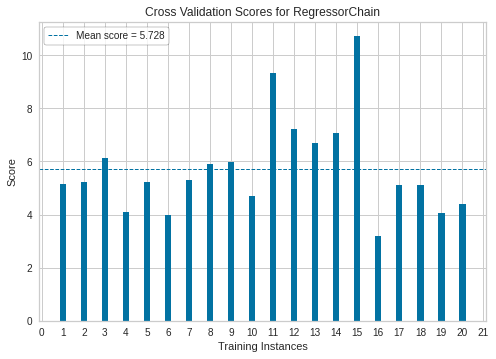

<AxesSubplot:title={'center':'Cross Validation Scores for RegressorChain'}, xlabel='Training Instances', ylabel='Score'>

In [61]:
cv_1 = KFold(n_splits=20)
#creating model
LR = LinearRegression()
model_lr = RegressorChain(base_estimator=LR)
#calculating the sMAPE_score for each cross validation
visualizer_lr = CVScores(model_lr, cv=cv_1, scoring=sMAPE_score)

visualizer_lr.fit(train_features, train_target)        # Fit the data to the visualizer
visualizer_lr.show()           # Finalize and render the figure

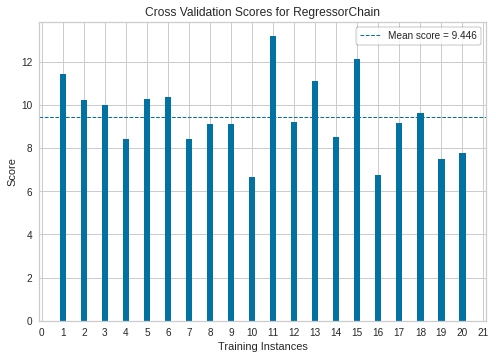

<AxesSubplot:title={'center':'Cross Validation Scores for RegressorChain'}, xlabel='Training Instances', ylabel='Score'>

In [62]:
#creating model using optimal hyperparameters
DT = DecisionTreeRegressor(random_state=13).set_params(**study_dt.best_params)
model_dt = RegressorChain(base_estimator=DT)
#calculating the sMAPE_score for each cross validation
visualizer_dt = CVScores(model_dt, cv=cv_1, scoring=sMAPE_score)

visualizer_dt.fit(train_features, train_target)        # Fit the data to the visualizer
visualizer_dt.show()           # Finalize and render the figure

In [63]:
#creating model using optimal hyperparameters
RF = RandomForestRegressor(random_state=13).set_params(**study_rf.best_params)
model_rf = RegressorChain(base_estimator=RF)
#calculating the sMAPE_score for each cross validation
visualizer_rf = CVScores(model_rf, cv=cv_1, scoring=sMAPE_score)

visualizer_rf.fit(train_features, train_target)        # Fit the data to the visualizer
visualizer_rf.show()           # Finalize and render the figure

KeyboardInterrupt: 

#### Conclusions

Looking at the three models above, the average sMAPE of the linear regression model, decision tree regression model, and the random forest regression model were 10%, 10%, and 8% respectively. This leads me to believe that the random forest regression model is the optimal model for predicting gold recovery from the inputs.  

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Very good, you used cross-validation to evaluate the models.
	  
</div>

## Final Testing

In [64]:
#fit  the model using the training features
model_lr.fit(train_features,train_target)
#predict the testing targets
y_pred_lr = model_lr.predict(test_features)
#show the final sMAPE score
sMAPE_lr = sMAPE_final(test_target, y_pred_lr)
print('sMAPE of Linear Regression Model:', sMAPE_lr)

#fit  the model using the training features
model_dt.fit(train_features,train_target)
#predict the testing targets
y_pred_dt = model_dt.predict(test_features)
#show the final sMAPE score
sMAPE_dt = sMAPE_final(test_target, y_pred_dt)
print('sMAPE of Decison Tree Regression Model:', sMAPE_dt)

#fit  the model using the training features
model_rf.fit(train_features,train_target)
#predict the testing targets
y_pred_rf = model_rf.predict(test_features)
#show the final sMAPE score
sMAPE_rf = sMAPE_final(test_target, y_pred_rf)
print('sMAPE of Random Forest Regression Model:', sMAPE_rf)


#fit  the model using the training features
DR = DummyRegressor(strategy="mean")
model_dm = RegressorChain(base_estimator=DR)
model_dm.fit(train_features,train_target)
#predict the testing targets
y_pred_dm = model_dm.predict(test_features)
#show the final sMAPE score
sMAPE_dm = sMAPE_final(test_target, y_pred_dm)
print('sMAPE of a Dummy Mean Regression Model:', sMAPE_dm)




sMAPE of Linear Regression Model: 5.619063558646044
sMAPE of Decison Tree Regression Model: 9.510794031364913
sMAPE of Random Forest Regression Model: 7.125786627936359
sMAPE of a Dummy Mean Regression Model: 10.289630376021034


### Conclusions

The results above show the Linear Regression Model performing the best with an sMAPE value around 9.4%. I am hesitant to say this is the best model though due to the results from the cross validation. I think the inconcistencies between the cross validation and testing, along with the similarity of the dummy mean regression sMAPE, shows a lack of robustness in our models.   

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Final models were evaluated on the test set.
    
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Please add some simple baseline, e.g. a constant model always predicting train target mean/median (it's convenient to use [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Very good!
	  
</div>

## Final Conclusions

Overall, this project should help Zyfra make decisions on which ores they should process. Yet, I think it is very difficult to find the optimal strategy without information on costs. The ideal anaylsis would be a cost-benefit analysis which compares the value added from purification to the cost of purification.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yeah, that makes sense!
    
</div>